In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.cluster import KMeans

In [ ]:
customers=pd.read_csv("https://raw.githubusercontent.com/JyothirmaiV13/Quest-labs-Ai/main/olist_customers_dataset.csv")
orders=pd.read_csv("https://raw.githubusercontent.com/JyothirmaiV13/Quest-labs-Ai/main/olist_orders_dataset.csv",parse_dates=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                         'order_delivered_customer_date',
                         'order_estimated_delivery_date'])
order_items=pd.read_csv("https://raw.githubusercontent.com/JyothirmaiV13/Quest-labs-Ai/main/olist_order_items_dataset.csv",parse_dates=['shipping_limit_date'])
order_payments= pd.read_csv("https://raw.githubusercontent.com/JyothirmaiV13/Quest-labs-Ai/main/olist_order_payments_dataset.csv")

In [ ]:
dfs=[customers,orders,order_items,order_payments]

#printing the shapes of our datasets
for df in dfs:
    print(df.shape)

(99441, 5)
(99441, 8)
(112650, 7)
(103886, 5)


Data Cleaning
Step 1: Merging the datasets

In [ ]:
df1 = order_items.merge(order_payments, on='order_id')
df2 = df1.merge(orders, on='order_id')
df = df2.merge(customers, on='customer_id')

In [ ]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   order_item_id                  117601 non-null  int64         
 2   product_id                     117601 non-null  object        
 3   seller_id                      117601 non-null  object        
 4   shipping_limit_date            117601 non-null  datetime64[ns]
 5   price                          117601 non-null  float64       
 6   freight_value                  117601 non-null  float64       
 7   payment_sequential             117601 non-null  int64         
 8   payment_type                   117601 non-null  object        
 9   payment_installments           117601 non-null  int64         
 10  payment_value                  117601 non-null  float64       
 11  

In [ ]:
df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [ ]:
df[df['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

order_status
shipped        1244
canceled        559
processing      375
invoiced        371
delivered         8
unavailable       7
approved          3
Name: count, dtype: int64

In [ ]:
df=df[df['order_status']=='delivered']

In [ ]:
df.isnull().sum()

order_id                          0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
payment_sequential                0
payment_type                      0
payment_installments              0
payment_value                     0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

In [ ]:
recency=df[['customer_unique_id','order_purchase_timestamp']].copy()

In [ ]:
# Since a customer may have more than one order, we will obtain his/her last purchase timestamp
recency = recency.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recency.columns = ['customer_unique_id', 'last_purchase_timestamp']

# Calculate the number of days since customers' last purchase
recency['inactive_days'] = (recency['last_purchase_timestamp'].max() - recency['last_purchase_timestamp']).dt.days
recency.drop(columns='last_purchase_timestamp', inplace=True)

<ipython-input-13-735ceb2bfe2a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(recency['inactive_days'], bins=50)


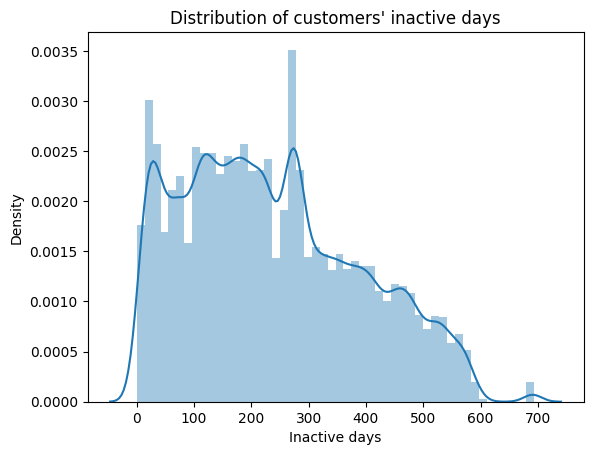

In [ ]:
sns.distplot(recency['inactive_days'], bins=50)
plt.xlabel('Inactive days')
plt.ylabel('Density')
plt.title("Distribution of customers' inactive days");

In [ ]:
inertia = {}

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km = km.fit(recency[['inactive_days']])
    inertia[k] = km.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

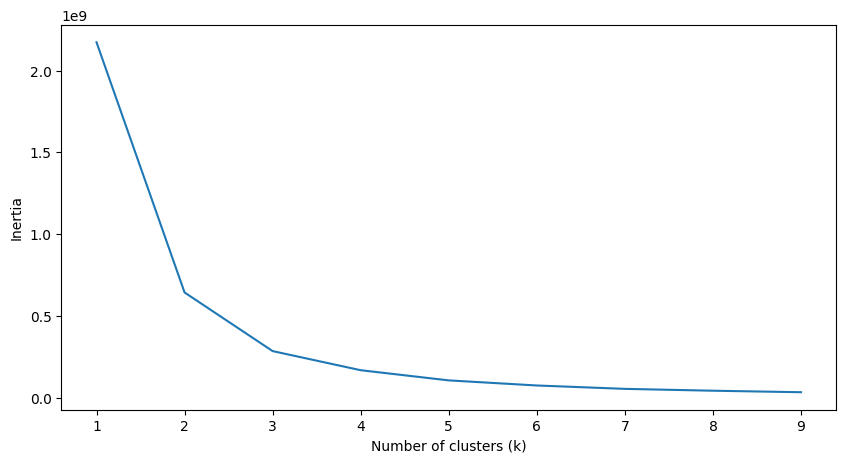

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

In [ ]:
km=KMeans(n_clusters=4, random_state=42)
km.fit(recency[['inactive_days']])
recency['cluster']=km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
recency.head()

,customer_unique_id,inactive_days,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1
2,0000f46a3911fa3c0805444483337064,536,2
3,0000f6ccb0745a6a4b88665a16c9f078,320,0
4,0004aac84e0df4da2b147fca70cf8255,287,0


In [ ]:
recency.groupby('cluster')['inactive_days'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,25348.0,61.224712,35.810246,0.0,28.0,61.0,94.0,121.0
3,27129.0,182.690368,35.207229,122.0,153.0,182.0,213.0,247.0
0,24270.0,313.020766,43.167006,248.0,276.0,306.0,350.0,397.0
2,16610.0,482.513666,58.840875,398.0,435.0,474.0,525.0,694.0


In [ ]:
recency_cluster=recency.groupby('cluster')['inactive_days'].mean().reset_index()
recency_cluster=recency_cluster.sort_values(by='inactive_days',ascending=False).reset_index(drop=True)
recency_cluster['index']=np.arange(0,4)
recency_cluster.set_index('cluster',inplace=True)
cluster_dict=recency_cluster['index'].to_dict()
recency['cluster'].replace(cluster_dict,inplace=True)

In [ ]:
recency.head()

,customer_unique_id,inactive_days,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,111,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,3
2,0000f46a3911fa3c0805444483337064,536,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1
4,0004aac84e0df4da2b147fca70cf8255,287,1


In [ ]:
recency.groupby(by='cluster')['inactive_days'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
3,25348.0,61.224712,35.810246,0.0,28.0,61.0,94.0,121.0
2,27129.0,182.690368,35.207229,122.0,153.0,182.0,213.0,247.0
1,24270.0,313.020766,43.167006,248.0,276.0,306.0,350.0,397.0
0,16610.0,482.513666,58.840875,398.0,435.0,474.0,525.0,694.0


FREQUENCY

In [ ]:
frequency=df[['customer_unique_id','order_id']].copy()

In [ ]:
frequency=frequency.groupby('customer_unique_id')['order_id'].count().reset_index()
frequency.columns=['customer_unique_id','number_of_orders']

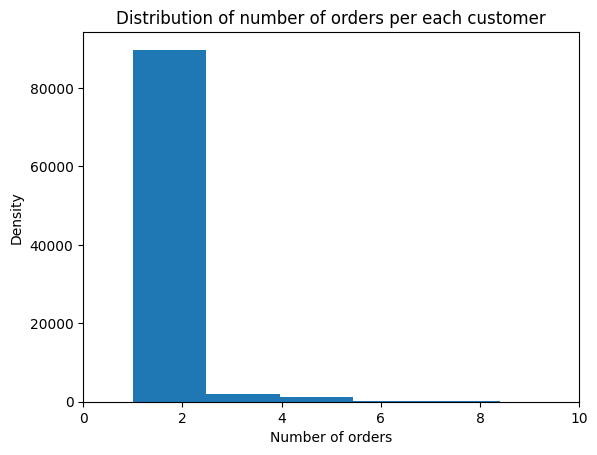

In [ ]:
frequency['number_of_orders'].plot.hist(bins=50)
plt.xlim(0,10)
plt.xlabel('Number of orders')
plt.ylabel('Density')
plt.title('Distribution of number of orders per each customer');

In [ ]:
inertia={}

for k in range(1,10):
  km=KMeans(n_clusters=k)
  km=km.fit(frequency[['number_of_orders']])
  inertia[k]=km.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

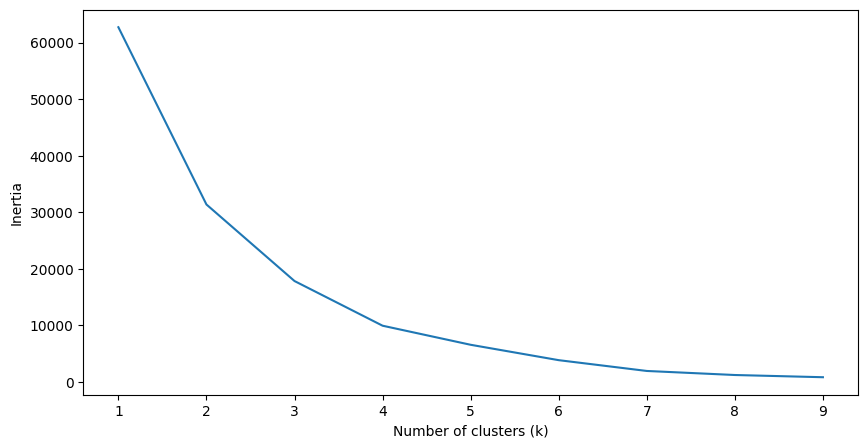

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(inertia.keys()),list(inertia.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

In [ ]:
km=KMeans(n_clusters=4,random_state=42)
km.fit(frequency[['number_of_orders']])
frequency['cluster']=km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
frequency.groupby('cluster')['number_of_orders'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,79337.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2,12325.0,2.154970,0.361890,2.0,2.0,2.0,2.0,3.0
1,1662.0,5.081829,1.695493,4.0,4.0,4.0,6.0,13.0
3,33.0,20.969697,11.303995,14.0,15.0,19.0,22.0,75.0


In [ ]:
# Renaming the clusters according the mean number_of_orders
frequency_cluster = frequency.groupby('cluster')['number_of_orders'].mean().reset_index()
frequency_cluster = frequency_cluster.sort_values(by='number_of_orders').reset_index(drop=True)
frequency_cluster['index'] = np.arange(0,4)
frequency_cluster.set_index('cluster', inplace=True)
cluster_dict = frequency_cluster['index'].to_dict()
frequency['cluster'].replace(cluster_dict, inplace=True)

In [ ]:
frequency.groupby('cluster')['number_of_orders'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,79337.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,12325.0,2.154970,0.361890,2.0,2.0,2.0,2.0,3.0
2,1662.0,5.081829,1.695493,4.0,4.0,4.0,6.0,13.0
3,33.0,20.969697,11.303995,14.0,15.0,19.0,22.0,75.0


MONETARY

In [ ]:
monetary=df[['customer_unique_id','payment_value']].copy()

In [ ]:
monetary=monetary.groupby('customer_unique_id')['payment_value'].sum().reset_index()

<ipython-input-40-ebc3914236c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monetary['payment_value'],hist=False)


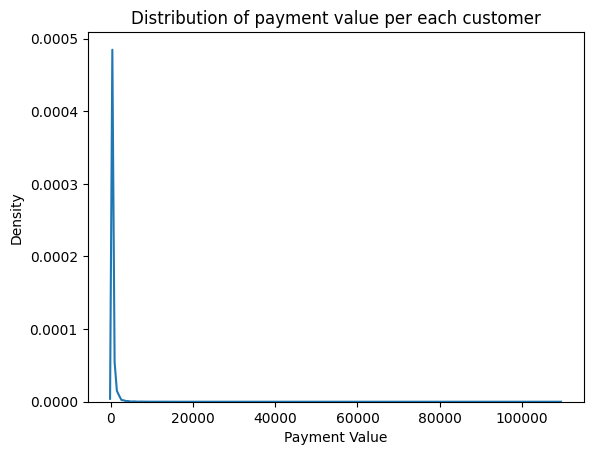

In [ ]:
sns.distplot(monetary['payment_value'],hist=False)
plt.xlabel('Payment Value')
plt.ylabel('Density')
plt.title('Distribution of payment value per each customer');

In [ ]:
inertia={}

for k in range(1,10):
  km=KMeans(n_clusters=k)
  km=km.fit(monetary[['payment_value']])
  inertia[k]=km.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

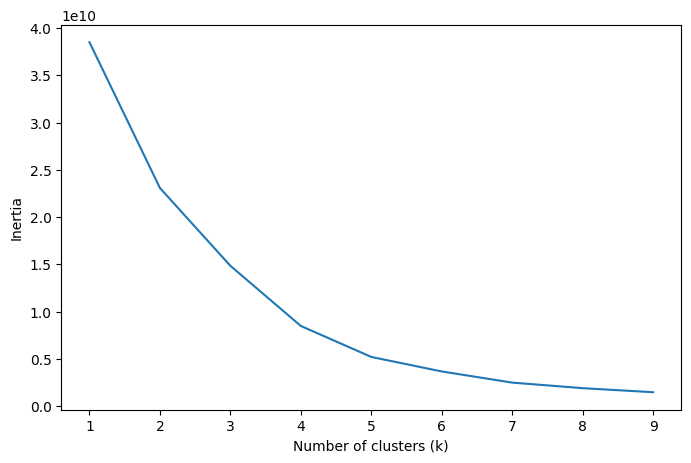

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(list(inertia.keys()),list(inertia.values()))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

In [ ]:
km=KMeans(n_clusters=4,random_state=42)
km.fit(monetary[['payment_value']])
monetary['cluster']=km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
monetary

,customer_unique_id,payment_value,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0
2,0000f46a3911fa3c0805444483337064,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,196.89,0
...,...,...,...
93352,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84,1
93353,fffea47cd6d3cc0a88bd621562a9d061,84.58,0
93354,ffff371b4d645b6ecea244b27531430a,112.46,0
93355,ffff5962728ec6157033ef9805bacc48,133.69,0


In [ ]:
monetary.groupby('cluster')['payment_value'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,92133.0,173.271747,192.630821,9.59,63.27,111.43,195.960,1436.46
1,1203.0,2692.243400,1668.973782,1436.84,1679.72,2065.35,2993.200,12490.88
2,20.0,23201.656000,9512.025508,14196.28,16880.72,19258.32,28226.475,45256.00
3,1.0,109312.640000,NaN,109312.64,109312.64,109312.64,109312.640,109312.64


In [ ]:
# Renaming the clusters according to mean number of payment_value
monetary_cluster = monetary.groupby('cluster')['payment_value'].mean().reset_index()
monetary_cluster = monetary_cluster.sort_values(by='payment_value').reset_index(drop=True)
monetary_cluster['index'] = np.arange(0,4)
monetary_cluster.set_index('cluster', inplace=True)
cluster_dict = monetary_cluster['index'].to_dict()
monetary['cluster'].replace(cluster_dict, inplace=True)

In [ ]:
monetary.groupby('cluster')['payment_value'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,92133.0,173.271747,192.630821,9.59,63.27,111.43,195.960,1436.46
1,1203.0,2692.243400,1668.973782,1436.84,1679.72,2065.35,2993.200,12490.88
2,20.0,23201.656000,9512.025508,14196.28,16880.72,19258.32,28226.475,45256.00
3,1.0,109312.640000,NaN,109312.64,109312.64,109312.64,109312.640,109312.64


Overall

In [ ]:
# Merge recency, frequency and monetary dataframes together on customer uuid
overall = recency.merge(frequency, on='customer_unique_id')
overall = overall.merge(monetary, on='customer_unique_id')

# Rename cluster columns
overall.rename(columns={'cluster_x': 'recency_cluster',
                       'cluster_y': 'frequency_cluster',
                       'cluster': 'monetary_cluster'},
              inplace=True)

# Sum up the clusters to obtain the overall score
overall['overall_score'] = overall['recency_cluster'] + overall['frequency_cluster'] + overall['monetary_cluster']

In [ ]:
overall.head()

,customer_unique_id,inactive_days,recency_cluster,number_of_orders,frequency_cluster,payment_value,monetary_cluster,overall_score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,3,1,0,141.90,0,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,3,1,0,27.19,0,3
2,0000f46a3911fa3c0805444483337064,536,0,1,0,86.22,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,1,0,43.62,0,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,1,0,196.89,0,1


In [ ]:
overall.groupby('overall_score')[['inactive_days', 'number_of_orders', 'payment_value']].mean()

,inactive_days,number_of_orders,payment_value
overall_score,,,
0,482.510130,1.000000,141.756811
1,329.177162,1.104257,167.187947
2,201.870359,1.175030,177.072601
3,83.613285,1.226805,200.559731
4,83.534207,2.490695,556.609518
5,97.805217,4.676522,1934.316383
6,79.445783,7.036145,4551.490361
7,100.333333,9.500000,25650.098333
8,21.000000,24.000000,27935.460000


We have now assigned customers a score that ranges from 0 to 8, with 8 being Olist's most valuable customers. For simplicity, we will re-group these customers into 3 segments:
- Scores 0 to 2: Low value
- Scores 3 to 4: Mid value
- Scores 5+: High value


In [ ]:
overall['segment']=overall['overall_score'].map(lambda x: 'low' if x<3 else ('mid' if x<5 else 'high'))

In [ ]:
overall['segment'].value_counts()

segment
low     63217
mid     29392
high      748
Name: count, dtype: int64

In [ ]:
overall.head()

,customer_unique_id,inactive_days,recency_cluster,number_of_orders,frequency_cluster,payment_value,monetary_cluster,overall_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,3,1,0,141.90,0,3,mid
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,3,1,0,27.19,0,3,mid
2,0000f46a3911fa3c0805444483337064,536,0,1,0,86.22,0,0,low
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,1,0,43.62,0,1,low
4,0004aac84e0df4da2b147fca70cf8255,287,1,1,0,196.89,0,1,low


In [ ]:
overall.groupby('segment')[['inactive_days', 'number_of_orders', 'payment_value']].mean().sort_values(by='payment_value')

,inactive_days,number_of_orders,payment_value
segment,,,
low,309.922774,1.110730,165.673213
mid,83.603021,1.390855,246.774004
high,93.648396,5.264706,2740.127500


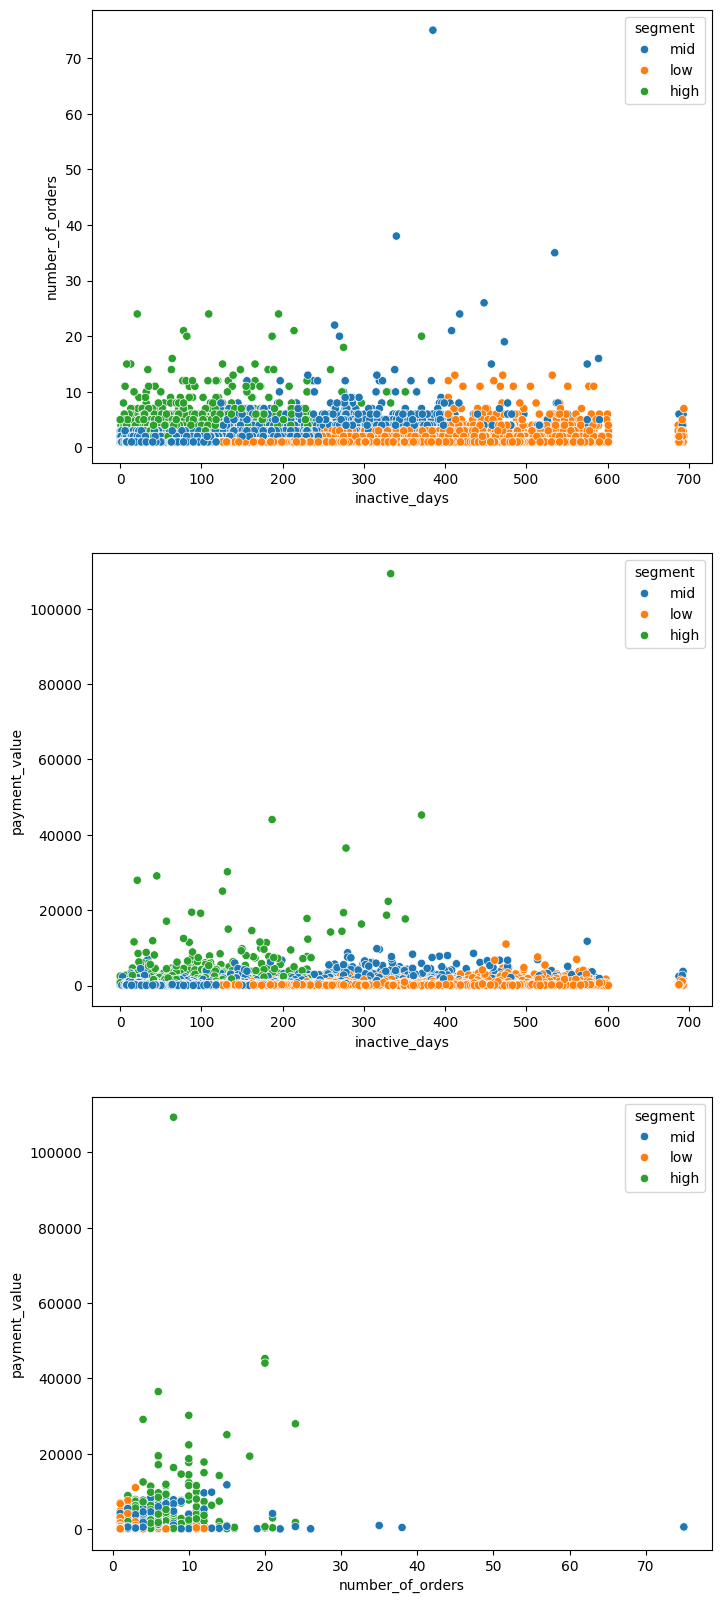

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(8,20))
sns.scatterplot(x='inactive_days', y='number_of_orders', ax=ax[0], hue='segment', data=overall)
sns.scatterplot(x='inactive_days', y='payment_value', ax=ax[1], hue='segment', data=overall)
sns.scatterplot(x='number_of_orders', y='payment_value', ax=ax[2], hue='segment', data=overall);